<a href="https://colab.research.google.com/github/rajashekar/colab/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Data analysis

In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/Colab/newpydomains/data

/content/drive/MyDrive/Colab/newpydomains/data


In [4]:
%ls

domain_final.csv  domain_with_cat.csv  shallalist          shallalist_all.csv
domain_text.csv   model.h5             shallalist2.tar.gz


In [5]:
# !gzip -d shallalist.gz

In [6]:
!head domain_final.csv

text,domain_names,cat_name
total home about right now assorted chocolate chip lucky in chocolate chocolate chip white chocolate chip deluxe oatmeal sugar contact us site by media,kizito,shopping
rule there is of no curiosity the june biggest and back and for this was chosen for a couple of reason in of the release of the new star trek not sure is the right reason a bit of insanity to ease me everyone back into that regular i had some freaky lined but it nearly broke my me sick when i tried to write it up as a so going for this which is admittedly not an attractive set of mental but more than this me want to scoop out my own brain with a salad reason on with the the biggest stick mudd on but is ceti alpha v big enough for both of these paramount star this is not for just for if harry you an report him to the proper the title biggest should give you one or two about what may unfold in this but unless thinking then a little off the let me enlighten khan sat at his waiting for his to he ra

In [7]:
!wc -l domain_final.csv

61326 domain_final.csv


In [8]:
df = pd.read_csv('domain_final.csv')

In [9]:
df.head()

,text,domain_names,cat_name
0,total home about right now assorted chocolate ...,kizito,shopping
1,rule there is of no curiosity the june biggest...,rule--34.blogspot,porn
2,home mission statement of faith login harvest ...,agapeharvestchurch,religion
3,western get instant and send money on the send...,westernunion.co,finance/other
4,new view more view more new view more alfa alf...,alfaromeo-jp,automobile/cars


In [10]:
df['cat_name'].unique()

array(['shopping', 'porn', 'religion', 'finance/other', 'automobile/cars',
       'forum', 'gamble', 'news', 'recreation/sports',
       'recreation/travel', 'hobby/games-online', 'education/schools',
       'music', 'chat', 'hobby/pets', 'finance/moneylending',
       'finance/insurance', 'finance/banking', 'radiotv',
       'recreation/martialarts', 'politics', 'hobby/games-misc',
       'automobile/bikes', 'science/chemistry', 'drugs', 'adv', 'webmail',
       'downloads', 'webradio', 'hospitals', 'government', 'warez',
       'redirector', 'recreation/humor', 'hobby/cooking',
       'recreation/restaurants', 'dating', 'dynamic', 'models',
       'jobsearch', 'alcohol', 'recreation/wellness',
       'finance/realestate', 'movies', 'spyware', 'military', 'weapons',
       'automobile/planes', 'homestyle', 'library', 'fortunetelling',
       'tracker', 'remotecontrol', 'sex/lingerie', 'violence',
       'searchengines', 'ringtones', 'isp', 'aggressive',
       'automobile/boats', 'ima

In [11]:
len(df['cat_name'].unique())

74

In [12]:
df.groupby('cat_name').count()

,text,domain_names
cat_name,,
adv,1920,1920
aggressive,91,91
alcohol,336,336
anonvpn,50,50
automobile/bikes,312,312
...,...,...
weapons,153,153
webmail,444,444
webphone,23,23


In [13]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [14]:
df.groupby('cat_name').count().index

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile/bikes',
       'automobile/boats', 'automobile/cars', 'automobile/planes', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic',
       'education/schools', 'finance/banking', 'finance/insurance',
       'finance/moneylending', 'finance/other', 'finance/realestate',
       'finance/trading', 'fortunetelling', 'forum', 'gamble', 'government',
       'hacking', 'hobby/cooking', 'hobby/games-misc', 'hobby/games-online',
       'hobby/gardening', 'hobby/pets', 'homestyle', 'hospitals',
       'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models',
       'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv',
       'recreation/humor', 'recreation/martialarts', 'recreation/restaurants',
       'recreation/sports', 'recreation/travel', 'recreation/wellness',
       'redirector', 'religion', 'remotecontrol', 'ringtones',
       'science/astronomy', 'science/chemistry', 'searchengines',
 

In [15]:
classes = df.groupby('cat_name').count().index

In [16]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73],
           dtype='int64', name='category_codes')

In [17]:
df.loc[df['category_codes'] == 72]

,text,domain_names,cat_name,category_codes
64,toggle navigation all streaming live streaming...,wyep.streamguys,webradio,72
116,toggle search form search toggle navigation ho...,wgmuradio,webradio,72
235,listen wake up call bill and and ken coast to ...,kfiam640,webradio,72
284,are you a fan of check out the welcome to the ...,radio-locator,webradio,72
347,radio simple for simple people radio seit sind...,radiosucks,webradio,72
...,...,...,...,...
60239,home splash splash reality a da de em da me pl...,radio.musica.uol.com,webradio,72
60319,twitter home current stairway stairway with tr...,ghostlytalk,webradio,72
60465,is currently off the please check back to this...,shoutbrothershout.homestead,webradio,72
60646,skip to content no de de no listen web rock ra...,webrockradio,webradio,72


In [18]:
df.head()

,text,domain_names,cat_name,category_codes
0,total home about right now assorted chocolate ...,kizito,shopping,61
1,rule there is of no curiosity the june biggest...,rule--34.blogspot,porn,44
2,home mission statement of faith login harvest ...,agapeharvestchurch,religion,53
3,western get instant and send money on the send...,westernunion.co,finance/other,18
4,new view more view more new view more alfa alf...,alfaromeo-jp,automobile/cars,6


In [19]:
df['domain_names'] + ' ' + df['text'] 

0        kizito total home about right now assorted cho...
1        rule--34.blogspot rule there is of no curiosit...
2        agapeharvestchurch home mission statement of f...
3        westernunion.co western get instant and send m...
4        alfaromeo-jp new view more view more new view ...
                               ...                        
61320    astro.elte information staff education researc...
61321    clarkjoneskarate sign in to control panel secu...
61322    inflagranti-music news rock pop dance party di...
61323    euribor the institute about the institute disc...
61324    unsw.edu skip to main content study study expl...
Length: 61325, dtype: object

In [20]:
len_of_text = df['text'].str.split("\\s+")

In [21]:
len_of_text.str.len().max()

15481712

In [22]:
df.loc[df['cat_name'] == 'news']

,text,domain_names,cat_name,category_codes
9,listen on air bosch schedule recently top radi...,wxra945,news,41
33,music music radio par format se continuer la m...,radio.m24,news,41
39,cover letter resume is a nationally columnist ...,ariannaonline,news,41
41,league de league de a la candela y hay de al t...,rpctv,news,41
46,and specialist franco magazine test sport tag ...,giornaledellavela,news,41
...,...,...,...,...
61233,tip de van en business sport folklore register...,zwartewaterkrant,news,41
61239,listen live listen to east coast gold big dona...,ecr.co,news,41
61261,league en de el bolivia red costa el canal cha...,canal7.com,news,41
61312,na a o na se se za a sa ale po na v die do v a...,noveslovo,news,41


# Split Data

In [23]:
X = (df['domain_names'] + ' ' + df['text']).values
y = df['category_codes'].values

In [24]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [25]:
X_train.size

42927

In [26]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([1337,   57,  238,   41,  210,   96,  718,  174, 2276,   37,  511,
         481,  581,  260, 2541, 1546,  646,  353,  153,  433,   81,  242,
        1480, 1274,  183,  101,  204,  499, 1831,  257, 1714,   70,  526,
         113,  201,  964,   52,   52,  345, 1095, 1420, 3603,   23,  485,
        1905, 1056,  203,  490,  377, 2308, 2150,  139,  220, 1380,   14,
          67,  270,   59,  111,   38,  130,  956,  111,  253,  200,   38,
          90,   20,  104,  112,  311,   13,  259,   39]))

In [27]:
X_rem.size

18398

In [28]:
np.unique(y_rem, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([ 583,   34,   98,    9,  102,   28,  328,   85,  969,    9,  222,
         229,  223,  100, 1107,  685,  298,  145,   76,  165,   37,   95,
         640,  583,   81,   37,   80,  235,  817,   98,  769,   22,  257,
          29,   95,  378,   25,   17,  169,  464,  618, 1523,   13,  206,
         747,  448,   92,  222,  170,  946,  912,   51,   96,  591,    3,
          18,  140,   20,   46,   17,   59,  392,   47,  107,   74,   15,
          34,    7,   48,   41,  133,   10,  111,   18]))

In [29]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [30]:
X_val.size

9199

In [31]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73], dtype=int8),
 array([291,  12,  59,  51,  12, 162,  39, 479,   4, 111, 118, 110,  53,
        557, 348, 147,  76,  35,  82,  13,  55, 352, 296,  37,  18,  37,
        118, 398,  53, 368,  14, 126,  15,  43, 183,  12,  11,  81, 244,
        330, 754,   8, 102, 359, 228,  60, 111,  85, 480, 432,  30,  48,
        287,   1,   9,  66,   8,  22,   9,  33, 208,  22,  57,  38,   6,
         15,   3,  24,  23,  65,   5,  46,   5]))

In [32]:
X_test.size

9199

In [33]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([292,  22,  39,   9,  51,  16, 166,  46, 490,   5, 111, 111, 113,
         47, 550, 337, 151,  69,  41,  83,  24,  40, 288, 287,  44,  19,
         43, 117, 419,  45, 401,   8, 131,  14,  52, 195,  13,   6,  88,
        220, 288, 769,   5, 104, 388, 220,  32, 111,  85, 466, 480,  21,
         48, 304,   2,   9,  74,  12,  24,   8,  26, 184,  25,  50,  36,
          9,  19,   4,  24,  18,  68,   5,  65,  13]))

In [34]:
X_train[10000]

'bmwparklane menu control park lane book a test drive book a service home finance and used business and contact us about the series coupe is find out close welcome to park the flagship offering nationwide used vehicle search your used vehicle search your new car search now used car search now news new car find out more martin general manager the journey to your next as simple and convenient for you as news park lane read more promotion the active tourer be one of the first to book a test and receive a voucher courtesy of red letter read more discover the of a electric or hybrid vehicle and calculate your potential fuel find out more explore our with our range now boasting more than ever finding the perfect for you never been find out more your whether a an accident a new accessory or simply advice you we can how can we help you business and fleet business company car a strong range of and thanks to highly and comprehensive combined with low running as a result of fuel and find out more

In [35]:
y_train[10000]

6

In [36]:
df[df['domain_names'].str.contains('www-tech')]

,text,domain_names,cat_name,category_codes
55538,and newspaper the first newspaper on the web h...,www-tech.mit,news,41


In [37]:
y_train = to_categorical(y_train, len(df['category_codes'].unique()))
y_val = to_categorical(y_val, len(df['category_codes'].unique()))
y_test = to_categorical(y_test, len(df['category_codes'].unique()))

In [38]:
y_train[10000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

# Creating Dataset

In [39]:
BATCH_SIZE = 64
BUFFER_SIZE = 600000

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [41]:
text_batch, label_batch = next(iter(train_dataset))
site_name, first_label = text_batch[0], label_batch[0]
print("Name", site_name)
print("Label", first_label)

Name tf.Tensor(b'greendaymusic green day home news tour music sign up store coffee home news tour music sign up store coffee green day scroll sessions between out now listen now catch the tour in the in get get green day sessions report an issue privacy policy of use ad policy green day and reprise', shape=(), dtype=string)
Label tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(74,), dtype=float32)


# Vectorization

In [42]:
max_features = 62000
sequence_length = 5000

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [43]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_dataset.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [44]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [45]:
print("Vectorized data", vectorize_text(site_name, first_label))

Vectorized data (<tf.Tensor: shape=(1, 5000), dtype=int64, numpy=array([[61031,  1051,   306, ...,     0,     0,     0]])>, <tf.Tensor: shape=(74,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>)


In [46]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1000 --->  girl
Vocabulary size: 62000


In [47]:
train_ds = train_dataset.map(vectorize_text)
val_ds = val_dataset.map(vectorize_text)
test_ds = test_dataset.map(vectorize_text)

In [48]:
# For performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [49]:
embedding_dim = 64
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          3968064   
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 74)                4810      
                                                                 
Total params: 3,972,874
Trainable params: 3,972,874
Non-trainable params: 0
______________________________________________

In [50]:
model_save_filename = "model.h5"

In [51]:
batch_size = 64
epochs = 500
initial_learning_rate = 0.006



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              metrics=['accuracy'])

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)

decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
  return lr * 1/ (1 + decay * epoch)

lrscheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)


In [52]:
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb, lrscheduler_cb])

Epoch 1/500
669/671 [============================>.] - ETA: 0s - loss: 3.6132 - accuracy: 0.1063
Epoch 1: val_accuracy improved from -inf to 0.14545, saving model to model.h5
671/671 [==============================] - 20s 28ms/step - loss: 3.6126 - accuracy: 0.1066 - val_loss: 3.4329 - val_accuracy: 0.1455 - lr: 0.0060
Epoch 2/500
670/671 [============================>.] - ETA: 0s - loss: 3.2850 - accuracy: 0.2140
Epoch 2: val_accuracy improved from 0.14545 to 0.24035, saving model to model.h5
671/671 [==============================] - 16s 24ms/step - loss: 3.2845 - accuracy: 0.2141 - val_loss: 3.1187 - val_accuracy: 0.2404 - lr: 0.0060
Epoch 3/500
670/671 [============================>.] - ETA: 0s - loss: 2.9930 - accuracy: 0.3016
Epoch 3: val_accuracy improved from 0.24035 to 0.32797, saving model to model.h5
671/671 [==============================] - 16s 24ms/step - loss: 2.9925 - accuracy: 0.3017 - val_loss: 2.8749 - val_accuracy: 0.3280 - lr: 0.0060
Epoch 4/500
670/671 [==========

In [53]:
model = tf.keras.models.load_model(model_save_filename)

# Evaluate

In [54]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

144/144 [==============================] - 1s 6ms/step - loss: 2.6787 - accuracy: 0.5417
Loss:  2.678734302520752
Accuracy:  0.5416893362998962


# Plot

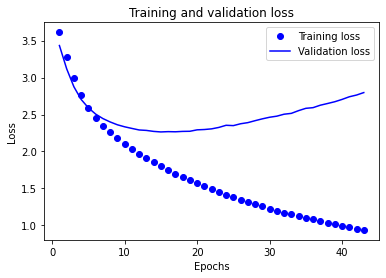

In [55]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

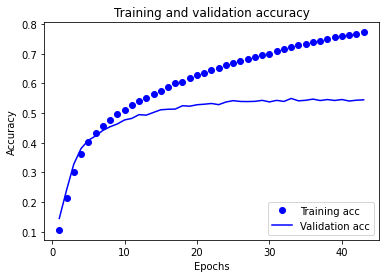

In [56]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save Model

In [57]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(test_dataset)
print(accuracy)

144/144 [==============================] - 1s 8ms/step - loss: 2.6787 - accuracy: 0.5417
0.5416893362998962


# Inference

In [58]:
examples = [
    "yahoo",
    "forbes",
    "draftkings",
    "sexsite",
    "pornhub",
    "xxxvideos",
    "google",
    "lesbianmates",
    "amazon",
    "facebook",
    "fidelity",
    "hentai",
    "manga",
    "youtube",
    "youporn",
    "bellesa"
]
results = export_model.predict(examples)


In [59]:
results

array([[0.03025665, 0.00142319, 0.01172601, ..., 0.00060682, 0.0075214 ,
        0.00158703],
       [0.03627209, 0.00135311, 0.01143233, ..., 0.00061338, 0.0061129 ,
        0.00144486],
       [0.03627209, 0.00135311, 0.01143233, ..., 0.00061338, 0.0061129 ,
        0.00144486],
       ...,
       [0.03627209, 0.00135311, 0.01143233, ..., 0.00061338, 0.0061129 ,
        0.00144486],
       [0.03627209, 0.00135311, 0.01143233, ..., 0.00061338, 0.0061129 ,
        0.00144486],
       [0.03627209, 0.00135311, 0.01143233, ..., 0.00061338, 0.0061129 ,
        0.00144486]], dtype=float32)

In [60]:
probs = tf.nn.softmax(results)

In [61]:
probs

<tf.Tensor: shape=(16, 74), dtype=float32, numpy=
array([[0.01374007, 0.01334955, 0.0134878 , ..., 0.01333866, 0.01343121,
        0.01335174],
       [0.01382288, 0.01334853, 0.01348375, ..., 0.01333866, 0.01341221,
        0.01334975],
       [0.01382288, 0.01334853, 0.01348375, ..., 0.01333866, 0.01341221,
        0.01334975],
       ...,
       [0.01382288, 0.01334853, 0.01348375, ..., 0.01333866, 0.01341221,
        0.01334975],
       [0.01382288, 0.01334853, 0.01348375, ..., 0.01333866, 0.01341221,
        0.01334975],
       [0.01382288, 0.01334853, 0.01348375, ..., 0.01333866, 0.01341221,
        0.01334975]], dtype=float32)>

In [62]:
res_args = tf.argmax(results, 1)

In [63]:
res_args

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44])>

In [64]:
res_args.numpy()

array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44])

In [65]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile/bikes',
       'automobile/boats', 'automobile/cars', 'automobile/planes', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic',
       'education/schools', 'finance/banking', 'finance/insurance',
       'finance/moneylending', 'finance/other', 'finance/realestate',
       'finance/trading', 'fortunetelling', 'forum', 'gamble', 'government',
       'hacking', 'hobby/cooking', 'hobby/games-misc', 'hobby/games-online',
       'hobby/gardening', 'hobby/pets', 'homestyle', 'hospitals',
       'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models',
       'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv',
       'recreation/humor', 'recreation/martialarts', 'recreation/restaurants',
       'recreation/sports', 'recreation/travel', 'recreation/wellness',
       'redirector', 'religion', 'remotecontrol', 'ringtones',
       'science/astronomy', 'science/chemistry', 'searchengines',
 

In [66]:
for i in range(len(examples)):
  print(f"{examples[i]} : {classes[res_args[i]]}")

yahoo : porn
forbes : porn
draftkings : porn
sexsite : porn
pornhub : porn
xxxvideos : porn
google : porn
lesbianmates : porn
amazon : porn
facebook : porn
fidelity : porn
hentai : porn
manga : porn
youtube : porn
youporn : porn
bellesa : porn
